# Prep & Code DataFrame Editing

***

### Imports

In [1]:
from py_files.visualization_functions import show_apps_timeline, two_by_two_subplt
from py_files.get_df_functions import get_responses, get_prep_df, get_timeline_df
import os
import pandas as pd
import numpy as np
import datetime as dt
import json

%load_ext autoreload
%autoreload 2

data_path = os.getenv('DATA_PATH')

## Get Data From Online Coding Sites

### Codewars

#### Call API

In [2]:
# username = os.getenv('USERNAME')
# page = 0
# url = f"https://www.codewars.com/api/v1/users/{username}/code-challenges/completed?page={page}"

In [3]:
# response = requests.get(url).json()
# data = response['data']


In [4]:
# codewars_df = pd.DataFrame(data)
# codewars_df.head(3)

,id,name,slug,completedLanguages,completedAt
0,526156943dfe7ce06200063e,My smallest code interpreter (aka Brainf**k),my-smallest-code-interpreter-aka-brainf-star-s...,[python],2023-01-30T01:48:32.158Z
1,51c8e37cee245da6b40000bd,Strip Comments,strip-comments,[python],2023-01-29T19:07:26.328Z
2,52597aa56021e91c93000cb0,Moving Zeros To The End,moving-zeros-to-the-end,[python],2023-01-11T18:26:28.450Z


In [5]:
# codewars_dates = codewars_df.loc[:, ['id','completedAt']]
# codewars_dates.head(3)

,id,completedAt
0,526156943dfe7ce06200063e,2023-01-30T01:48:32.158Z
1,51c8e37cee245da6b40000bd,2023-01-29T19:07:26.328Z
2,52597aa56021e91c93000cb0,2023-01-11T18:26:28.450Z


In [6]:
# dates = [pd.to_datetime(x) for x in codewars_dates['completedAt']]
# form_dates = [x.strftime('%Y-%m-%d') for x in dates]
        
# codewars_dates.loc[:, 'completedAt'] = form_dates
# codewars_dates
# codewars_dates = codewars_dates[codewars_dates['completedAt'] > '2022-12-31']
# final_df = codewars_dates.rename(columns={'completedAt': 'date_completed'})
# final_df

,id,date_completed
0,526156943dfe7ce06200063e,2023-01-30
1,51c8e37cee245da6b40000bd,2023-01-29
2,52597aa56021e91c93000cb0,2023-01-11
3,520b9d2ad5c005041100000f,2023-01-11
4,514b92a657cdc65150000006,2023-01-11
5,5526fc09a1bbd946250002dc,2023-01-11
6,5aa7a581fd8c06b552000177,2023-01-11


#### Write to DF

In [20]:
# file_path = data_path + '/codewars.json'
# result = final_df.to_json(orient='table')
# parsed = json.loads(result)

# with open(file_path, "w") as jsonFile:
#     json.dump(parsed, jsonFile, indent=4)
#     print(f'new data added sucessfully to {file_path}')

#### Get DF

In [37]:
# file_path = data_path + '/codewars.json'
# cw_df = pd.read_json(file_path, orient='table')
# cw_df

,Submissions,date_completed
0,526156943dfe7ce06200063e,2023-01-30
1,51c8e37cee245da6b40000bd,2023-01-29
2,52597aa56021e91c93000cb0,2023-01-11
3,520b9d2ad5c005041100000f,2023-01-11
4,514b92a657cdc65150000006,2023-01-11
5,5526fc09a1bbd946250002dc,2023-01-11
6,5aa7a581fd8c06b552000177,2023-01-11


### Hacker Rank

In [33]:
# file_path = data_path + '/hackerrank.json'
# hack_df = pd.read_json(file_path, orient='table')
# hack_df

,Submissions,date_completed
0,Simple Array Sum,2023-02-04
1,Climbing the Leaderboard,2023-02-03
2,Java Date and Time,2023-02-03
3,Java Static Initializer Block,2023-02-03
4,Java End-of-file,2023-02-03
5,Java Loops II,2023-02-03
6,Java Loops I,2023-02-03
7,Java Stdin and Stdout II,2023-02-03
8,Java If-Else,2023-02-03
9,Java Stdin and Stdout I,2023-02-03


## Add to graph

In [ ]:
# data = {}
# other_df = pd.DataFrame(data)

In [36]:
# file_path = data_path + '/codewars.json'
# result = cw_df.to_json(orient='table')
# parsed = json.loads(result)

# with open(file_path, "w") as jsonFile:
#     json.dump(parsed, jsonFile, indent=4)
#     print(f'new data added sucessfully to {file_path}')

new data added sucessfully to /Users/Emily/code/emilycardwell/my-jobs/data/codewars.json


In [233]:
get_responses()

final_outcome,date_applied,Immediate Rejection,Rejected Post-Interview,No Response,In Interviews
0,2023-01-04,5,0,1,0
1,2023-01-07,0,1,1,0
2,2023-01-11,1,0,2,0
3,2023-01-13,1,0,0,0
4,2023-01-22,1,0,0,0
5,2023-01-23,0,0,0,1
6,2023-01-26,1,0,0,0
7,2023-02-09,0,0,4,0
8,2023-02-14,0,0,2,0


In [223]:
get_prep_df()

,date_completed,Challenges Completed
0,2023-01-05,5
1,2023-01-06,5
2,2023-01-07,3
3,2023-01-11,5
4,2023-01-12,4
5,2023-01-20,4
6,2023-01-25,4
7,2023-01-29,1
8,2023-01-30,5
9,2023-02-01,5


In [234]:
get_timeline_df()

,date,Immediate Rejection,Rejected Post-Interview,No Response,In Interviews,Challenges Completed
0,2023-01-04,5,0,1,0,0
1,2023-01-05,0,0,0,0,5
2,2023-01-06,0,0,0,0,5
3,2023-01-07,0,1,1,0,3
4,2023-01-11,1,0,2,0,5
5,2023-01-12,0,0,0,0,4
6,2023-01-13,1,0,0,0,0
7,2023-01-20,0,0,0,0,4
8,2023-01-22,1,0,0,0,0
9,2023-01-23,0,0,0,1,0


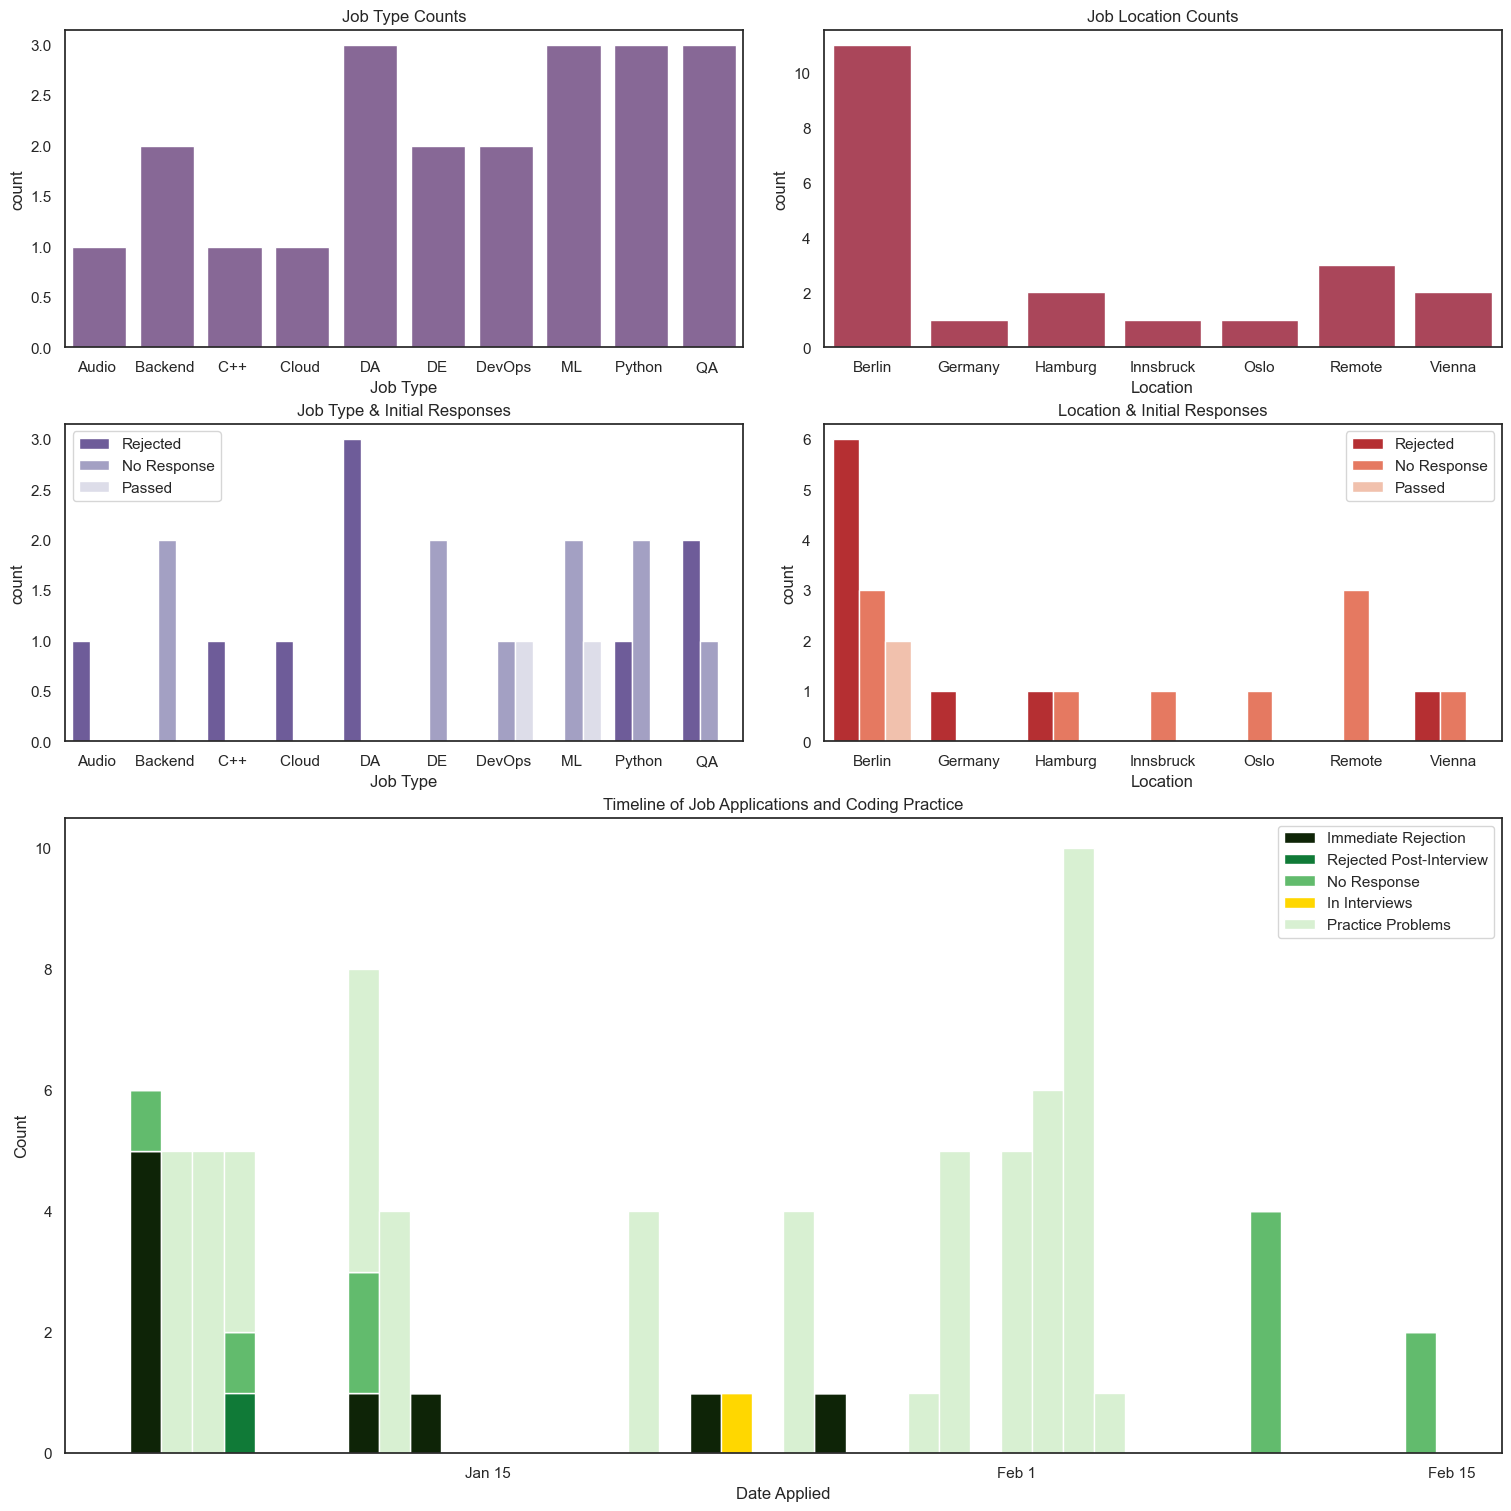

In [286]:
two_by_two_subplt()